# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [25]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [32]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [33]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN


In [34]:
np.nan

nan

In [35]:
type(np.nan)

float

In [36]:
df.isna().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL_ALL_EST                  169
TOTAL_REVENUE                   127
FEDERAL_REVENUE                 127
STATE_REVENUE                   127
LOCAL_REVENUE                   127
TOTAL_EXPENDITURE               127
INSTRUCTION_EXPENDITURE         127
SUPPORT_SERVICES_EXPENDITURE    127
OTHER_EXPENDITURE               169
CAPITAL_OUTLAY_EXPENDITURE      127
ENROLL_PREK                      81
ENROLL_KINDER                    76
ENROLL_4                         76
ENROLL_8                         76
ENROLL_12                        76
ENROLL_PRIMARY                  209
ENROLL_HS                       158
ENROLL_ALL                       76
AVG_MATH_4_SCORE                129
AVG_MATH_8_SCORE                129
AVG_READING_4_SCORE               0
AVG_READING_8_SCORE              88
dtype: int64

In [37]:
df.notna().sum()

PRIMARY_KEY                     650
STATE                           650
YEAR                            650
ENROLL_ALL_EST                  481
TOTAL_REVENUE                   523
FEDERAL_REVENUE                 523
STATE_REVENUE                   523
LOCAL_REVENUE                   523
TOTAL_EXPENDITURE               523
INSTRUCTION_EXPENDITURE         523
SUPPORT_SERVICES_EXPENDITURE    523
OTHER_EXPENDITURE               481
CAPITAL_OUTLAY_EXPENDITURE      523
ENROLL_PREK                     569
ENROLL_KINDER                   574
ENROLL_4                        574
ENROLL_8                        574
ENROLL_12                       574
ENROLL_PRIMARY                  441
ENROLL_HS                       492
ENROLL_ALL                      574
AVG_MATH_4_SCORE                521
AVG_MATH_8_SCORE                521
AVG_READING_4_SCORE             650
AVG_READING_8_SCORE             562
dtype: int64

In [38]:
df.count()

PRIMARY_KEY                     650
STATE                           650
YEAR                            650
ENROLL_ALL_EST                  481
TOTAL_REVENUE                   523
FEDERAL_REVENUE                 523
STATE_REVENUE                   523
LOCAL_REVENUE                   523
TOTAL_EXPENDITURE               523
INSTRUCTION_EXPENDITURE         523
SUPPORT_SERVICES_EXPENDITURE    523
OTHER_EXPENDITURE               481
CAPITAL_OUTLAY_EXPENDITURE      523
ENROLL_PREK                     569
ENROLL_KINDER                   574
ENROLL_4                        574
ENROLL_8                        574
ENROLL_12                       574
ENROLL_PRIMARY                  441
ENROLL_HS                       492
ENROLL_ALL                      574
AVG_MATH_4_SCORE                521
AVG_MATH_8_SCORE                521
AVG_READING_4_SCORE             650
AVG_READING_8_SCORE             562
dtype: int64

In [39]:
df.dropna()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


In [40]:
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)

In [45]:
df["ENROLL_ALL"].isna().sum()
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 Reading*

How many years of data are logged in our dataset? 

In [54]:
print(df["YEAR"].unique())
yrs = df.groupby("YEAR")

totalYrs = 14
print(totalYrs)



[1992 1994 1998 2002 2003 2005 2007 2009 2011 2013 2015 2017 2000 2019]
14


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [67]:
st = df.groupby("STATE")
st["AVG_READING_4_SCORE"].mean()

STATE
ALABAMA                 212.615385
ALASKA                  209.888889
ARIZONA                 210.230769
ARKANSAS                214.692308
CALIFORNIA              208.230769
COLORADO                222.666667
CONNECTICUT             227.000000
DELAWARE                220.384615
DISTRICT_OF_COLUMBIA    197.000000
DODEA                   228.636364
FLORIDA                 219.384615
GEORGIA                 216.230769
HAWAII                  210.153846
IDAHO                   221.000000
ILLINOIS                218.666667
INDIANA                 222.250000
IOWA                    222.538462
KANSAS                  222.000000
KENTUCKY                220.846154
LOUISIANA               207.230769
MAINE                   224.384615
MARYLAND                220.846154
MASSACHUSETTS           231.230769
MICHIGAN                217.833333
MINNESOTA               222.923077
MISSISSIPPI             207.769231
MISSOURI                220.538462
MONTANA                 224.000000
NATIONAL      

In [68]:
print("The 4th grade reading scores for Ohio are higher than the scores for Michigan")

The 4th grade reading scores for Ohio are higher than the scores for Michigan


Find the average for your chosen test across all states in 2019

In [75]:
st["AVG_READING_4_SCORE"].mean()

STATE
ALABAMA                 212.615385
ALASKA                  209.888889
ARIZONA                 210.230769
ARKANSAS                214.692308
CALIFORNIA              208.230769
COLORADO                222.666667
CONNECTICUT             227.000000
DELAWARE                220.384615
DISTRICT_OF_COLUMBIA    197.000000
DODEA                   228.636364
FLORIDA                 219.384615
GEORGIA                 216.230769
HAWAII                  210.153846
IDAHO                   221.000000
ILLINOIS                218.666667
INDIANA                 222.250000
IOWA                    222.538462
KANSAS                  222.000000
KENTUCKY                220.846154
LOUISIANA               207.230769
MAINE                   224.384615
MARYLAND                220.846154
MASSACHUSETTS           231.230769
MICHIGAN                217.833333
MINNESOTA               222.923077
MISSISSIPPI             207.769231
MISSOURI                220.538462
MONTANA                 224.000000
NATIONAL      

In [84]:
#instruction expediture for michigan and ohio
st["SUPPORT_SERVICES_EXPENDITURE"].mean()

STATE
ALABAMA                 1.720983e+06
ALASKA                  7.873763e+05
ARIZONA                 2.140003e+06
ARKANSAS                1.151735e+06
CALIFORNIA              1.668835e+07
COLORADO                2.191813e+06
CONNECTICUT             2.196482e+06
DELAWARE                4.048191e+05
DISTRICT_OF_COLUMBIA    3.807008e+05
DODEA                            NaN
FLORIDA                 6.396252e+06
GEORGIA                 3.809487e+06
HAWAII                  5.750204e+05
IDAHO                   5.479844e+05
ILLINOIS                8.367516e+06
INDIANA                 2.983926e+06
IOWA                    1.342383e+06
KANSAS                  1.386540e+06
KENTUCKY                1.656858e+06
LOUISIANA               1.910841e+06
MAINE                   6.385836e+05
MARYLAND                3.028407e+06
MASSACHUSETTS           3.574798e+06
MICHIGAN                5.694805e+06
MINNESOTA               2.185227e+06
MISSISSIPPI             1.059042e+06
MISSOURI                2.396559

In [85]:
print("The support services expenditure for Ohio is higher than that of Michigan")

The support services expenditure for Ohio is higher than that of Michigan


In [73]:
st["TOTAL_EXPENDITURE"].mean()

STATE
ALABAMA                 5.796977e+06
ALASKA                  2.253621e+06
ARIZONA                 6.699986e+06
ARKANSAS                3.827079e+06
CALIFORNIA              5.787106e+07
COLORADO                6.874192e+06
CONNECTICUT             7.372137e+06
DELAWARE                1.412934e+06
DISTRICT_OF_COLUMBIA    1.043562e+06
DODEA                            NaN
FLORIDA                 2.184091e+07
GEORGIA                 1.374952e+07
HAWAII                  1.809264e+06
IDAHO                   1.788398e+06
ILLINOIS                2.641222e+07
INDIANA                 9.783011e+06
IOWA                    4.821387e+06
KANSAS                  4.753783e+06
KENTUCKY                5.393387e+06
LOUISIANA               6.122336e+06
MAINE                   2.153696e+06
MARYLAND                9.836641e+06
MASSACHUSETTS           1.210609e+07
MICHIGAN                1.776416e+07
MINNESOTA               8.987560e+06
MISSISSIPPI             3.459030e+06
MISSOURI                8.017603

In [76]:
print("The total expenditure for Ohio is higher than that of Michigan")

The total expenditure for Ohio is higher than that of Michigan


For each state, find a maximum value for your chosen test score

In [70]:
st["AVG_READING_4_SCORE"].max() 

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [87]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

df['SUPPORT_SERVICES_EXPENDITURE_PER_TOTAL_EXPENDITURE'] = df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] / df['TOTAL_EXPENDITURE']

Feature engineering justification: **I created two features: SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT and EXPENDITURE_PER_STUDENT. In my EDA, I noticed that Ohio had higher average 4th grade reading scores than michigan and also higher support services expediture and total expenditure. This led me to infer that maybe a state's support services expenditure per student correlates with higher reading scores and a greater support services expenditure out of total expenditure also correlates to higher reading scores**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Reading Score')

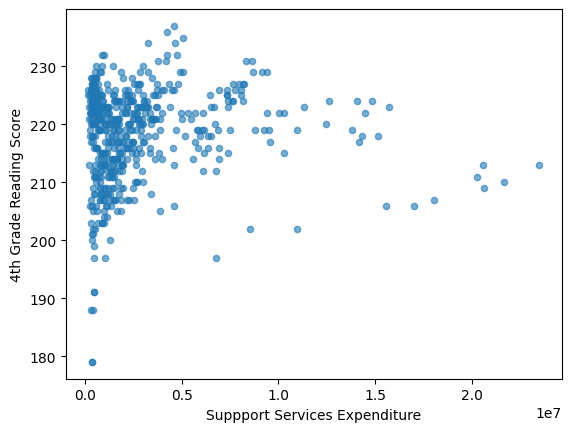

In [90]:
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('Suppport Services Expenditure')
plt.ylabel('4th Grade Reading Score')

**Contrary to what I had initially inferred, the scatterplot above indicates that as the support services expenditure increases, the 4th grade reading scores tend to generally decrease. Additionally, many of the higher reading scores were associated with lower support services expenditures (as shown by the clustering in the top left corner in the scatterplot.
**

**Visualization 2**

Text(0, 0.5, '4th Grade Reading Score')

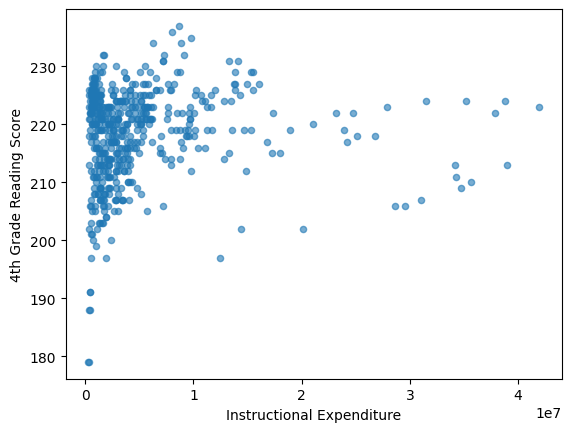

In [91]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='AVG_READING_4_SCORE', alpha=0.6)
plt.xlabel('Instructional Expenditure')
plt.ylabel('4th Grade Reading Score')

**Contrary to my initial inference, a state's instructional expenditure is not correlated to higher 4th grade reading scores-- in fact it appears from the scatterplot above that lower instructional expenditure is associated with higher 4th grade reading scores**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [89]:
from sklearn.model_selection import train_test_split

In [92]:
X = df[['AVG_MATH_4_SCORE','AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_READING_4_SCORE']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [95]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [96]:
# create your model here
model = LinearRegression()

In [97]:
model.fit(X_train, y_train)

LinearRegression()

In [98]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [100]:
print(model.score(X_test, y_test))
print(np.mean(model.predict(X_test)-y_test))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

0.8713213135870759
0.12251472782814865
2.398572978489491


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

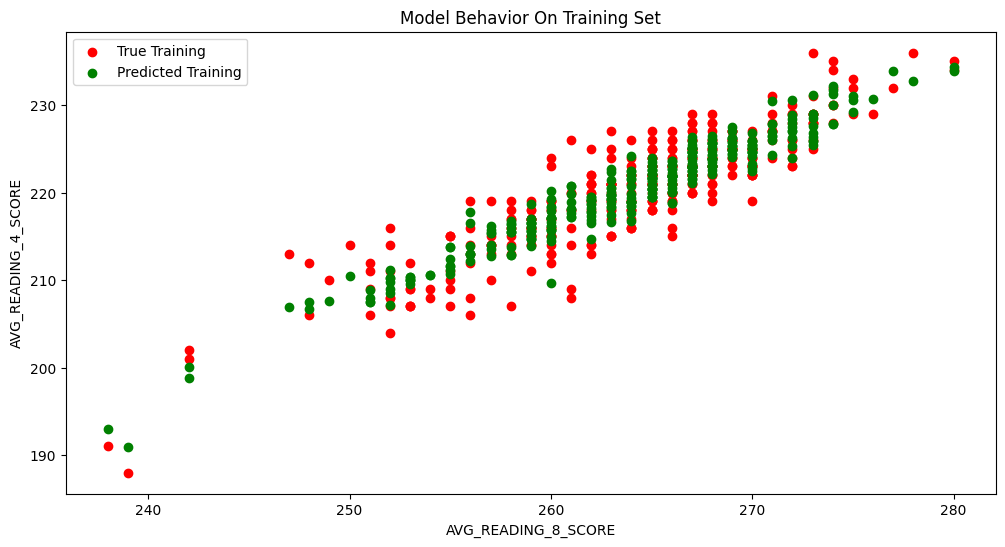

In [102]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_4_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

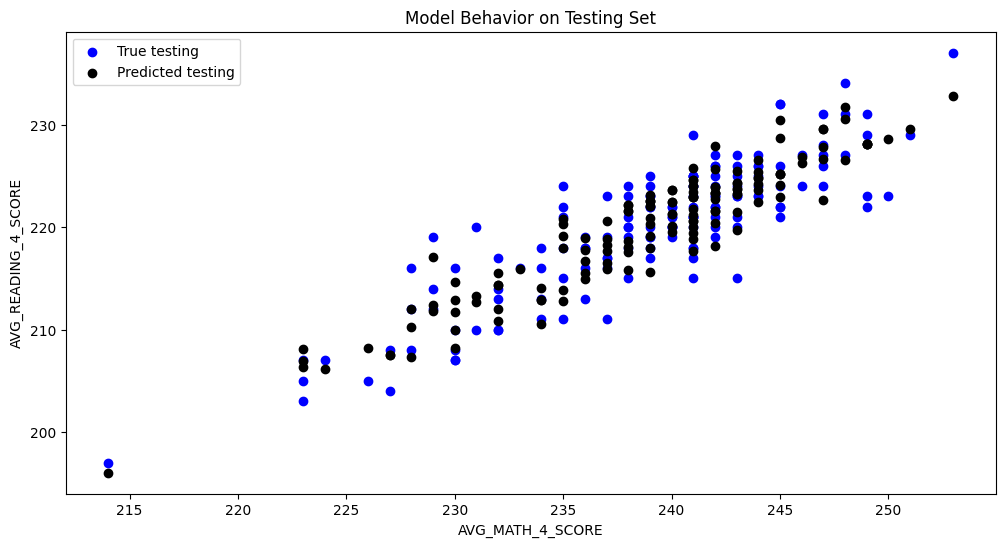

In [103]:
col_name = "AVG_MATH_4_SCORE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_READING_4_SCORE')
plt.title("Model Behavior on Testing Set")